In [143]:

# Import for OpenCV
import cv2

import numpy as np
import matplotlib.pyplot as plt 

# install  libraries in terminal if not found
# pip install matplotlib
# pip install numpy

# Load the image and get it as BGR
image = cv2.imread("./Giraf.jpg")


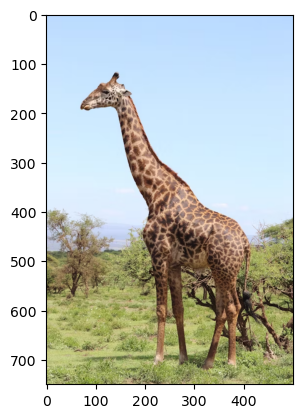

In [144]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

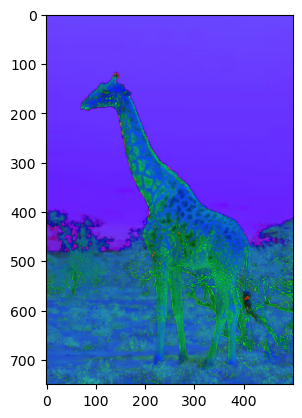

In [145]:
# 1. Convert the image to HSV image
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(image_hsv)

In [146]:
# 2. Target the brownish colors, choose the lower and upper color bounds
'''
    HSV Component	   Range	         Meaning
    Hue      	      5  -- 25	         Covers reddish-brown to light tan
    Saturation	      50 -- 255	         Filters out very gray colors
    Value	          20 -- 200	         Keeps it darker (brown, not orange or white)
'''
lower_brown = np.array([5,50,20])
upper_brown = np.array([25,255,200])


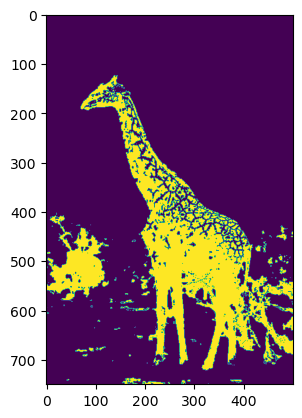

In [147]:
# 3. Creating a binary mask image, so as to select the brown colors only and near colors
# Here the brown values in the range will be 1 , and all other colors will be 0
brown_binary_mask = cv2.inRange(image_hsv, lower_brown, upper_brown)
plt.imshow(brown_binary_mask)

# Invert the mask to target everything that is NOT brown to value 1
not_brown_mask = cv2.bitwise_not(brown_binary_mask)



Hue channel matrix:
[[106 106 106 ... 106 106 106]
 [106 106 106 ... 106 106 106]
 [106 106 106 ... 106 106 106]
 ...
 [ 34  34  34 ...  33  33  33]
 [ 34  34  34 ...  33  33  33]
 [ 34  34  34 ...  33  33  33]]


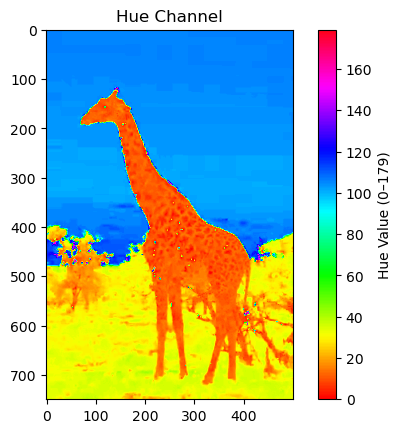

In [148]:
# Extract the Hue channel (channel index 0)
hue_channel = image_hsv[:, :, 0]

# View the Hue matrix
print("Hue channel matrix:")
print(hue_channel)

plt.imshow(hue_channel, cmap='hsv')
plt.colorbar(label='Hue Value (0–179)')
plt.title('Hue Channel')
plt.show()

In [149]:
# 4. Make segmentaion to isolate the brown colors and extract it 
#  Replace the color you don't want to black
# I want to replace the green color with black 


# black_hsv = np.uint8([[[120, 255, 0]]])
# #plt.imshow(black_hsv)

# black_bgr = cv2.cvtColor(black_hsv, cv2.COLOR_HSV2BGR)[0][0]
# # Copy image to image_result
# image_result = image.copy()

# # Change the image to black bgr
# image_result[mask>1] = black_bgr

# Set target (non-brown) regions to black
image_result = image.copy()
image_result[not_brown_mask > 0] = [0, 0, 0]  # set all colors not brown to Black in BGR

# Convert the image from BGR to RGB back
image_result_rgb = cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB)


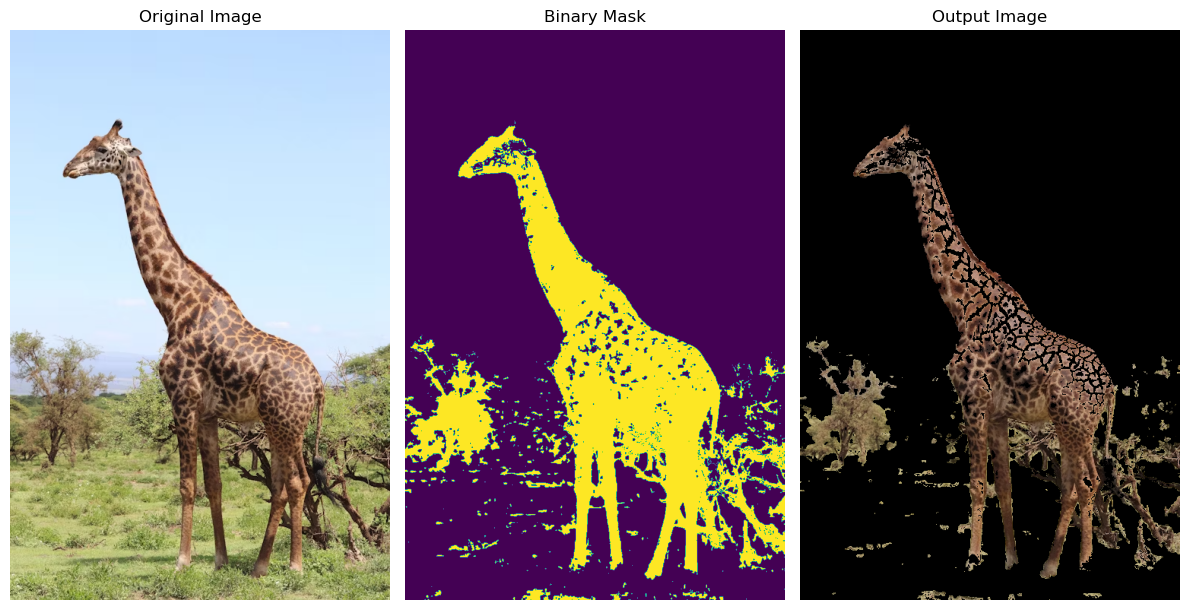

In [150]:
# Plot the images for comparison

fig, axs = plt.subplots(1,3, figsize=(12,6))
#I want to show the original image 
axs[0].imshow(image_rgb)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Show the binary mask image 
axs[1].imshow(mask)
axs[1].set_title("Binary Mask")
axs[1].axis('off')

# Show the output image 
axs[2].imshow(image_result_rgb)
axs[2].set_title("Output Image")
axs[2].axis('off')

plt.tight_layout()
plt.show()